In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [3]:
import torch
torch.__version__

'1.11.0+cu113'

In [4]:
!pip install fastai==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import fastai
fastai.__version__

'2.6.3'

In [6]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [7]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from google.colab import files
# files.upload()

In [8]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [01:04<00:00, 68.7MB/s]
100% 2.70G/2.70G [01:04<00:00, 45.2MB/s]


In [10]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [11]:
data_path='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [12]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)

tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item, 
                                    batch_tmfs=tfms_for_batch, valid_pct=0.15, shuffle=True)

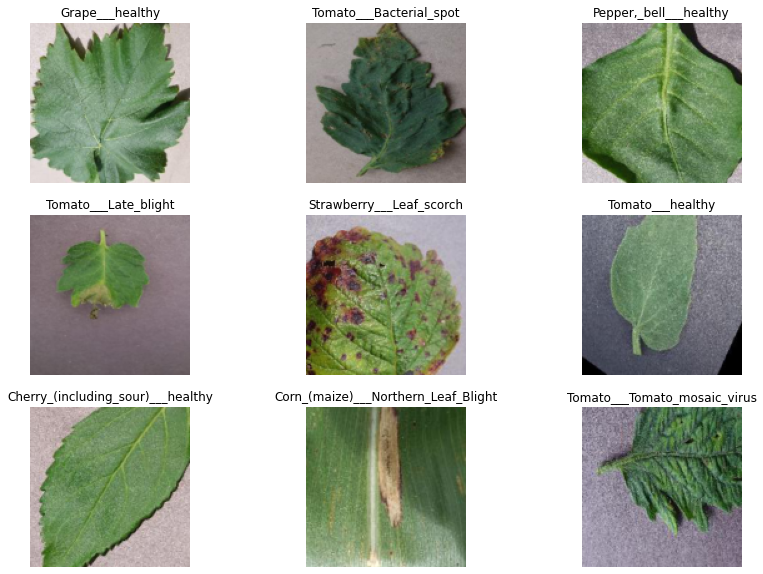

In [13]:
data.show_batch(figsize=(14,10))

In [14]:
print('Number of classes', data.c)

Number of classes 38


In [15]:
model=cnn_learner(data,resnet34, metrics=accuracy, model_dir='tmp/model/')

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0010000000474974513)

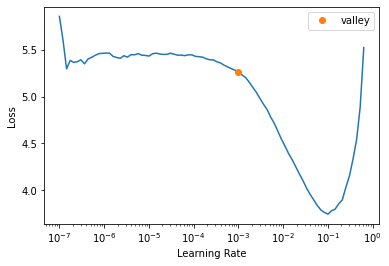

In [16]:
model.lr_find()

In [17]:
model.fit_one_cycle(5,0.0025)

epoch,train_loss,valid_loss,accuracy,time
0,0.299712,0.124848,0.958649,04:27
1,0.169812,0.068003,0.976707,04:10
2,0.109202,0.035507,0.987936,04:03
3,0.064687,0.018390,0.993247,04:02
4,0.059671,0.015911,0.994082,04:02


In [18]:
model.save('my_model.pkl')

Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/tmp/model/my_model.pkl.pth')

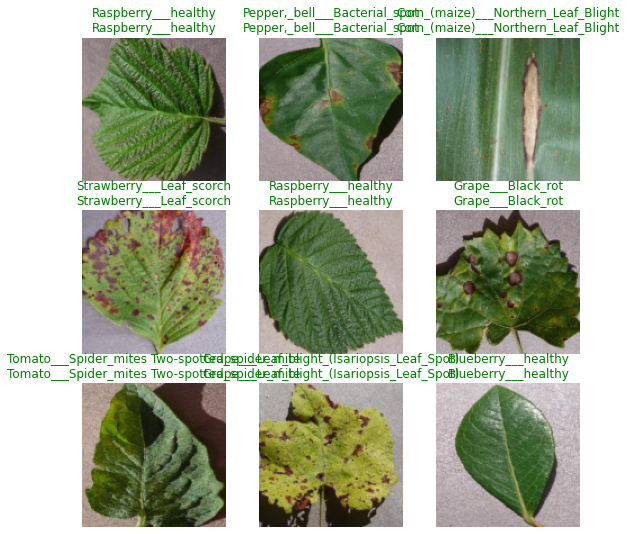

In [19]:
model.show_results()

In [20]:
interpretation = Interpretation.from_learner(model)

In [21]:
interp2=ClassificationInterpretation.from_learner(model)

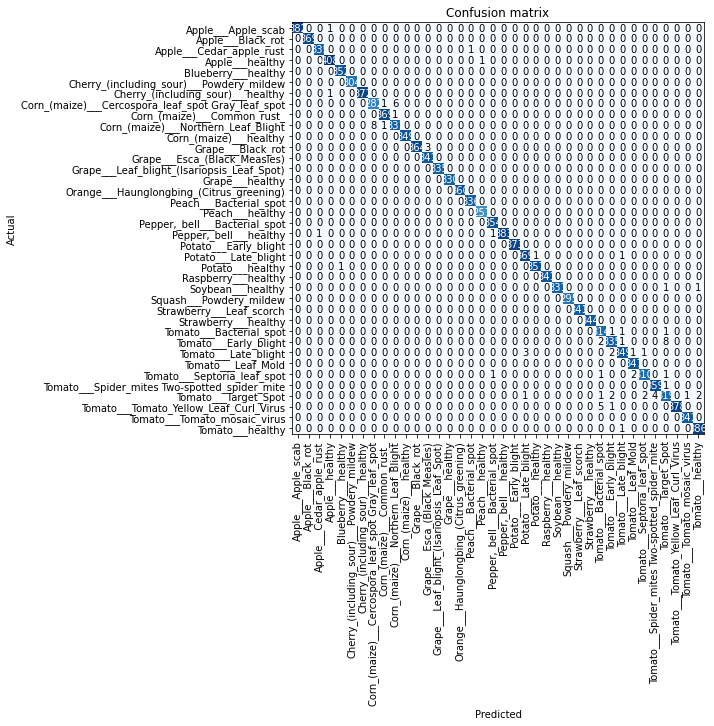

In [22]:
interp2.plot_confusion_matrix(figsize=(15,10))

In [23]:
interp2.most_confused(min_val=2)

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  8),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 8),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  6),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 5),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 4),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 3),
 ('Tomato___Late_blight', 'Potato___Late_blight', 3),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 2),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 2),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 2),
 ('Tomato___Target_Spot', 'Tomato___Early_blight', 2),
 ('Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Target_Spot', 'Tomato___healthy', 2)]